In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manishkumar2011
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:04<00:00, 234MB/s]


In [3]:
train="/content/dogs-vs-cats/train"
test="/content/dogs-vs-cats/test"

In [4]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [5]:
# load training data
train_data=keras.utils.image_dataset_from_directory(
    directory=train,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

test_data=keras.utils.image_dataset_from_directory(
    directory=test,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normaliztion
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [15]:
# create model
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# convert 2d to 1d
model.add(Flatten())

# dense layer with dropout
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(train_data, epochs=3, validation_data=test_data)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.5585 - loss: 0.7221 - val_accuracy: 0.7094 - val_loss: 0.5689
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7180 - loss: 0.5533 - val_accuracy: 0.7716 - val_loss: 0.4788
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.7952 - loss: 0.4364 - val_accuracy: 0.7836 - val_loss: 0.4821


In [9]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

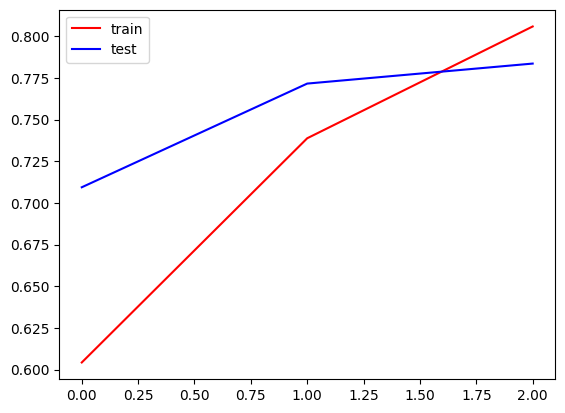

In [10]:
# plot the accuracy train-test
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()
plt.show()

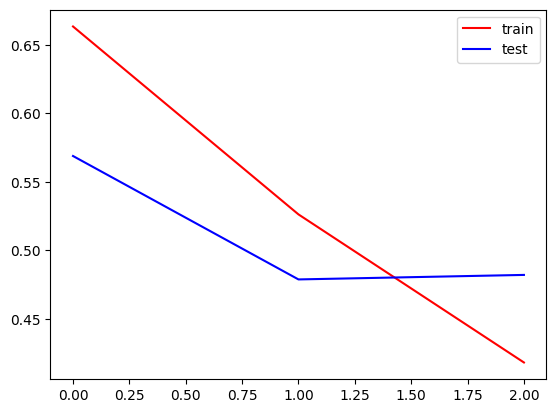

In [11]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="test")
plt.legend()
plt.show()

In [43]:
# user input predict
img_path='/content/dogs-vs-cats/train/cats/cat.1.jpg'
img=keras.utils.load_img(img_path, target_size=(256,256))

#convert to array
img_array=keras.utils.img_to_array(img)

# normalize
img_array=img_array/255.0

img_array=np.expand_dims(img_array, axis=0)

prob=model.predict(img_array)[0][0]
print(f"Probability: {prob}")

Pred_class=1 if prob>0.5 else 0
print(f"Predicted class: {Pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Probability: 0.49087849259376526
Predicted class: 0


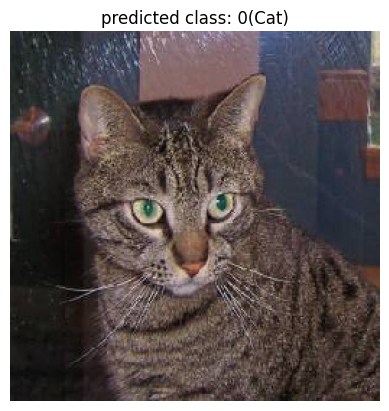

In [45]:
plt.imshow(img)
plt.axis('off')
plt.title(f'predicted class: {Pred_class}({"Dog" if Pred_class==1 else "Cat"})')
plt.show()

In [14]:
model.save("catvsdog.h5")

In [51]:
# user input predict
img_path='/content/dogs-vs-cats/test/dogs/dog.100.jpg'
img=keras.utils.load_img(img_path, target_size=(256,256))

#convert to array
img_array=keras.utils.img_to_array(img)

# normalize
img_array=img_array/255.0

img_array=np.expand_dims(img_array, axis=0)

prob=model.predict(img_array)[0][0]
print(f"Probability: {prob}")

Pred_class=0 if prob>0.5 else 1
print(f"Predicted class: {Pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability: 0.4955141842365265
Predicted class: 1


In [36]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.49551418]], dtype=float32)

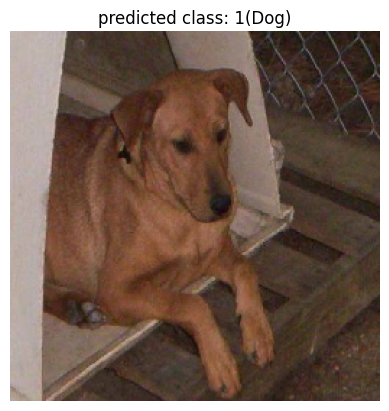

In [53]:
plt.imshow(img)
plt.axis('off')
plt.title(f'predicted class: {Pred_class}({"Cat" if Pred_class==0 else "Dog"})')
plt.show()